In [16]:
import numpy as np
import pickle 
import sys, os
sys.path.append("..")
from logger import Logger
import matplotlib.pyplot as plt

# Analysis of CVA vs CAVIA vs MAML

What can we plot? 

For CVA, we have experiments of 100k_j_i_0_25, where i \in {1 10 100} is the number of updates used during evaluation, with 0 inner updates and 25 tasks per meta step (or step in this case as there is no inner step), and j is the number of tasks used. 
Furthermore, we have the same experiments in remb100k_j_i_0_25, with the only difference being that the embeddings were reinitialized after each gradient step.  

For CAVIA, we have j__k_25, where j is the same as above, and k is the number of inner updates \in {1 10}

For MAML, we have the same as CAVIA

In [17]:
def get_logger(pth):
    with open(pth, 'rb') as f:
        logger = pickle.load(f)
    logger.train_loss = np.asarray(logger.train_loss)
    logger.train_conf = np.asarray(logger.train_conf)

    logger.valid_loss = np.asarray(logger.valid_loss)
    logger.valid_conf = np.asarray(logger.valid_conf)

    logger.test_loss = np.asarray(logger.test_loss)
    logger.test_conf = np.asarray(logger.test_conf)

    logger.elapsed_time = np.asarray(logger.elapsed_time)
    return logger

In [18]:
# get the CVA loggers for each amount of data
cva_root = '../cva_sine_result_files/long'
eval_steps = [10, 100]
cva_loggers = {
    10: {}, 100: {}, 1000: {}, 10000: {}, 100000: {}, 1000000: {}
}
for i in eval_steps:
    cva_loggers[10][i] = get_logger(cva_root + '100k_10_' + str(i) + '_0_25.pkl')
    cva_loggers[100][i] = get_logger(cva_root + '100k_100_' + str(i) + '_0_25.pkl')
    cva_loggers[1000][i] = get_logger(cva_root + '100k_1000_' + str(i) + '_0_25.pkl')
    cva_loggers[10000][i] = get_logger(cva_root + '100k_10000_' + str(i) + '_0_25.pkl')
    cva_loggers[100000][i] = get_logger(cva_root + '100k_100000_' + str(i) + '_0_25.pkl')
    cva_loggers[1000000][i] = get_logger(cva_root + '100k_1000000_' + str(i) + '_0_25.pkl')

# get CVA reinitialized loggers
rcva_loggers = {
    10: {}, 100: {}, 1000: {}, 10000: {}, 100000: {}, 1000000: {}
}
for i in eval_steps:
    rcva_loggers[10][i] = get_logger(cva_root + 'remb100k_10_' + str(i) + '_0_25.pkl')
    rcva_loggers[100][i] = get_logger(cva_root + 'remb100k_100_' + str(i) + '_0_25.pkl')
    rcva_loggers[1000][i] = get_logger(cva_root + 'remb100k_1000_' + str(i) + '_0_25.pkl')
    rcva_loggers[10000][i] = get_logger(cva_root + 'remb100k_10000_' + str(i) + '_0_25.pkl')
    rcva_loggers[100000][i] = get_logger(cva_root + 'remb100k_100000_' + str(i) + '_0_25.pkl')
    rcva_loggers[1000000][i] = get_logger(cva_root + 'remb100k_1000000_' + str(i) + '_0_25.pkl')

In [19]:
# get CAVIA loggers
cavia_root = '../sine_result_files/long'
cavia_loggers = {
    10: {}, 100: {}, 1000: {}, 10000: {}, 100000: {}, 1000000: {}
}
inner_steps = [1, 10]
for i in inner_steps:
    cavia_loggers[10][i] = get_logger(cavia_root + '10__' + str(i) + '_25.pkl')
    cavia_loggers[100][i] = get_logger(cavia_root + '100__' + str(i) + '_25.pkl')
    cavia_loggers[1000][i] = get_logger(cavia_root + '1000__' + str(i) + '_25.pkl')
    cavia_loggers[10000][i] = get_logger(cavia_root + '10000__' + str(i) + '_25.pkl')
    cavia_loggers[100000][i] = get_logger(cavia_root + '100000__' + str(i) + '_25.pkl')
    cavia_loggers[1000000][i] = get_logger(cavia_root + '1000000__' + str(i) + '_25.pkl')

In [20]:
# get maml loggers
maml_root = '../maml_sine_result_files/long'
maml_loggers = {
    10: {}, 100: {}, 1000: {}, 10000: {}, 100000: {}, 1000000: {}
}
for i in inner_steps:
    maml_loggers[10][i] = get_logger(maml_root + '10__' + str(i) + '_25.pkl')
    maml_loggers[100][i] = get_logger(maml_root + '100__' + str(i) + '_25.pkl')
    maml_loggers[1000][i] = get_logger(maml_root + '1000__' + str(i) + '_25.pkl')
    maml_loggers[10000][i] = get_logger(maml_root + '10000__' + str(i) + '_25.pkl')
    maml_loggers[100000][i] = get_logger(maml_root + '100000__' + str(i) + '_25.pkl')
    maml_loggers[1000000][i] = get_logger(maml_root + '1000000__' + str(i) + '_25.pkl')

First, plot all of the cva data and compare - one plot for each number of eval iterations, one line per number of training functions

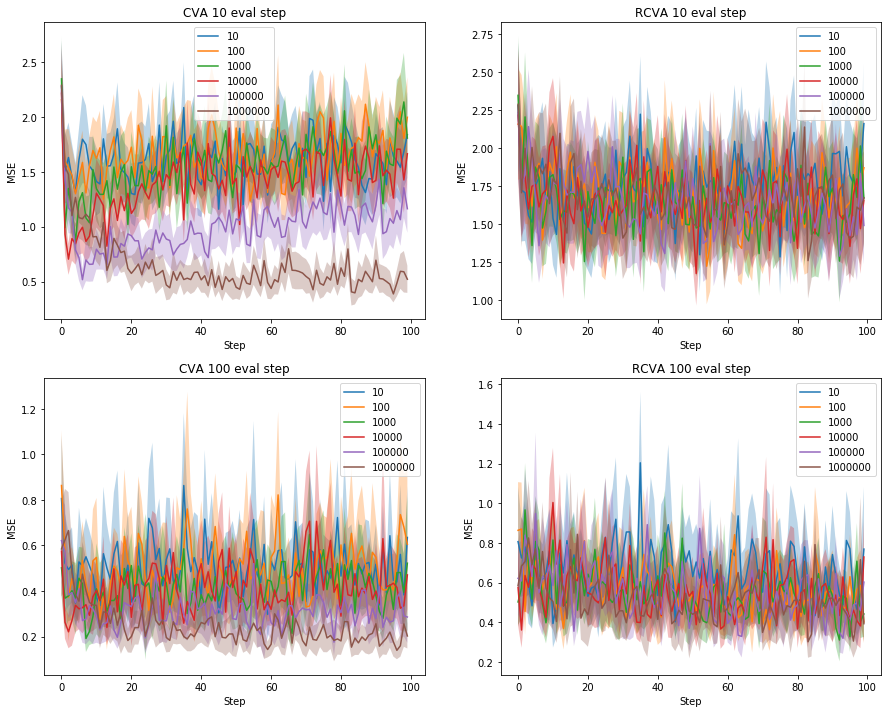

In [41]:
ntfs = [10, 100, 1000, 10000, 100000, 1000000]
alpha = 0.3

# plt.subplot(3,2,1)
# for ntf in ntfs:
#     dat = cva_loggers[ntf][1]
#     x = np.arange(dat.test_loss.shape[0])
#     plt.plot(x, dat.test_loss, label=str(ntf))
#     plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
# plt.title('CVA 1 eval step')
# plt.ylabel('MSE')
# plt.xlabel('Step')
# plt.legend()

# plt.subplot(3,2,2)
# for ntf in ntfs:
#     dat = rcva_loggers[ntf][1]
#     x = np.arange(dat.test_loss.shape[0])
#     plt.plot(x, dat.test_loss, label=str(ntf))
#     plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
# plt.title('RCVA 1 eval step')
# plt.ylabel('MSE')
# plt.xlabel('Step')
# plt.legend()

plt.subplot(2,2,1)
for ntf in ntfs:
    dat = cva_loggers[ntf][10]
    x = np.arange(dat.test_loss.shape[0])
    plt.plot(x, dat.test_loss, label=str(ntf))
    plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
plt.title('CVA 10 eval step')
plt.ylabel('MSE')
plt.xlabel('Step')
plt.legend()

plt.subplot(2,2,2)
for ntf in ntfs:
    dat = rcva_loggers[ntf][10]
    x = np.arange(dat.test_loss.shape[0])
    plt.plot(x, dat.test_loss, label=str(ntf))
    plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
plt.title('RCVA 10 eval step')
plt.ylabel('MSE')
plt.xlabel('Step')
plt.legend()

plt.subplot(2,2,3)
for ntf in ntfs:
    dat = cva_loggers[ntf][100]
    x = np.arange(dat.test_loss.shape[0])
    plt.plot(x, dat.test_loss, label=str(ntf))
    plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
plt.title('CVA 100 eval step')
plt.ylabel('MSE')
plt.xlabel('Step')
plt.legend()

plt.subplot(2,2,4)
for ntf in ntfs:
    dat = rcva_loggers[ntf][100]
    x = np.arange(dat.test_loss.shape[0])
    plt.plot(x, dat.test_loss, label=str(ntf))
    plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
plt.title('RCVA 100 eval step')
plt.ylabel('MSE')
plt.xlabel('Step')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15,12)
plt.show()

Now make this plot for MAML and CAVIA

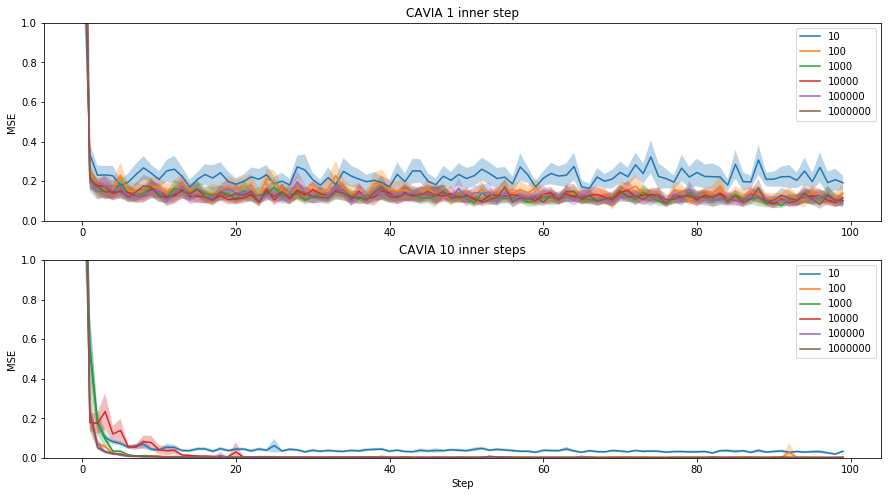

In [39]:
ntfs = [10, 100, 1000, 10000, 100000, 1000000]
alpha = 0.3

plt.subplot(2,1,1)
for ntf in ntfs:
    dat = cavia_loggers[ntf][1]
    x = np.arange(dat.test_loss.shape[0])
    plt.plot(x, dat.test_loss, label=str(ntf))
    plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
plt.title('CAVIA 1 inner step')
plt.ylabel('MSE')
plt.ylim(0, 1)
plt.legend()

plt.subplot(2,1,2)
for ntf in ntfs:
    dat = cavia_loggers[ntf][10]
    x = np.arange(dat.test_loss.shape[0])
    plt.plot(x, dat.test_loss, label=str(ntf))
    plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
plt.title('CAVIA 10 inner steps')
plt.ylabel('MSE')
plt.xlabel('Step')
plt.ylim(0, 1)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

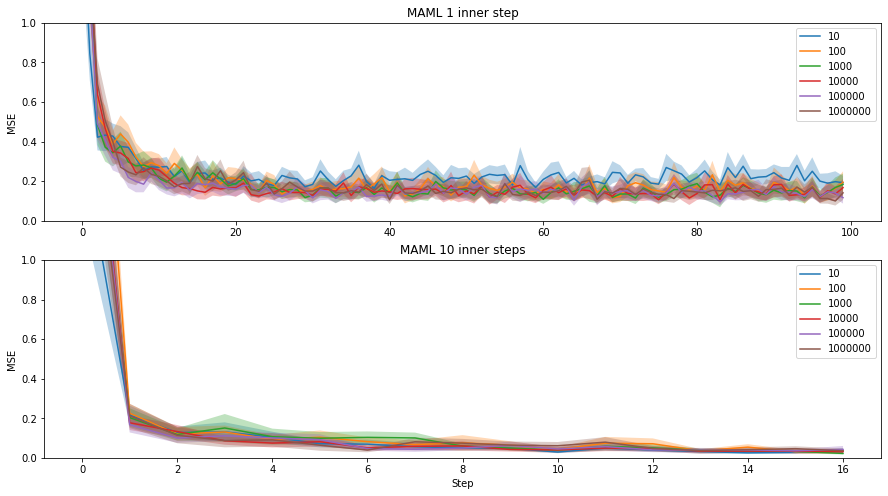

Stats for MAML with 10 inner steps, max: 2.518259534835815, min: 0.03138310264563188


In [40]:
ntfs = [10, 100, 1000, 10000, 100000, 1000000]
alpha = 0.3

plt.subplot(2,1,1)
for ntf in ntfs:
    dat = maml_loggers[ntf][1]
    x = np.arange(dat.test_loss.shape[0])
    plt.plot(x, dat.test_loss, label=str(ntf))
    plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
plt.title('MAML 1 inner step')
plt.ylabel('MSE')
plt.ylim(0, 1)
plt.legend()

plt.subplot(2,1,2)
for ntf in ntfs:
    dat = maml_loggers[ntf][10]
    x = np.arange(dat.test_loss.shape[0])
    plt.plot(x, dat.test_loss, label=str(ntf))
    plt.fill_between(x, dat.test_loss+dat.test_conf, dat.test_loss-dat.test_conf, alpha=alpha)
plt.title('MAML 10 inner steps')
plt.ylabel('MSE')
plt.xlabel('Step')
plt.ylim(0, 1)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

print(f'Stats for MAML with 10 inner steps, max: {np.max(maml_loggers[10000][10].test_loss)}, min: {np.min(maml_loggers[10000][10].test_loss)}')

Now make a pretty plot, with each method on it, of MSE vs Number of training functions.  Have one line for each method at 10, 1000, and 100000 data points

In [26]:
cva1 = []
cva1conf = []
cva10 = []
cva10conf = []
cva100 = []
cva100conf = []
for i in ntfs:
#     idx = np.argmin(cva_loggers[i][1].test_loss)
#     cva1.append(cva_loggers[i][1].test_loss[idx])
#     cva1conf.append(cva_loggers[i][1].test_loss[idx])
    idx = np.argmin(cva_loggers[i][10].test_loss)
    cva10.append(cva_loggers[i][10].test_loss[idx])
    cva10conf.append(cva_loggers[i][10].test_loss[idx])
    idx = np.argmin(cva_loggers[i][100].test_loss)
    cva100.append(cva_loggers[i][10].test_loss[idx])
    cva100conf.append(cva_loggers[i][100].test_loss[idx])

cavia1 = []
cavia1conf = []
cavia10 = []
cavia10conf = []
for i in ntfs:
    idx = np.argmin(cavia_loggers[i][1].test_loss)
    cavia1.append(cavia_loggers[i][1].test_loss[idx])
    cavia1conf.append(cavia_loggers[i][1].test_loss[idx])
    idx = np.argmin(cavia_loggers[i][10].test_loss)
    cavia10.append(cavia_loggers[i][10].test_loss[idx])
    cavia10conf.append(cavia_loggers[i][10].test_loss[idx])
    
maml1 = []
maml1conf = []
# maml10 = []
# maml10conf = []
for i in ntfs:
    idx = np.argmin(maml_loggers[i][1].test_loss)
    maml1.append(maml_loggers[i][1].test_loss[idx])
    maml1conf.append(maml_loggers[i][1].test_loss[idx])
#     idx = np.argmin(maml_loggers[i][10].test_loss)
#     maml10.append(maml_loggers[i][10].test_loss[idx])
#     maml10conf.append(maml_loggers[i][10].test_loss[idx])

In [27]:
# make numpy arrays
cva1 = np.asarray(cva1)
cva1conf = np.asarray(cva1conf)
cva10 = np.asarray(cva10)
cva10conf = np.asarray(cva10conf)
cva100 = np.asarray(cva100)
cva100conf = np.asarray(cva100conf)
cavia1 = np.asarray(cavia1)
cavia1conf = np.asarray(cavia1conf)
cavia10 = np.asarray(cavia10)
cavia10conf = np.asarray(cavia10conf)
maml1 = np.asarray(maml1)
maml1conf = np.asarray(maml1conf)

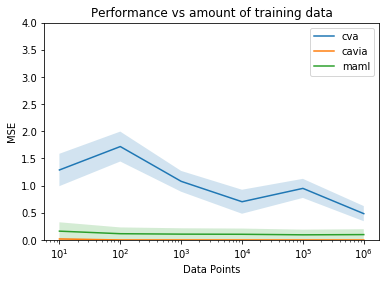

In [28]:
alpha = 0.2
# add cva to plot
# plt.plot(ntfs, cva1, label='cva1')
# plt.fill_between(ntfs, cva1-cva1conf, cva1+cva1conf, alpha=alpha)
# plt.plot(ntfs, cva10, label='cva10')
# plt.fill_between(ntfs, cva10-cva10conf, cva10+cva10conf, alpha=alpha)
plt.plot(ntfs, cva100, label='cva')
plt.fill_between(ntfs, cva100-cva100conf, cva100+cva100conf, alpha=alpha)
# add cavia to plot
# plt.plot(ntfs, cavia1, label='cavia1')
# plt.fill_between(ntfs, cavia1-cavia1conf, cavia1+cavia1conf, alpha=alpha)
plt.plot(ntfs, cavia10, label='cavia')
plt.fill_between(ntfs, cavia10-cavia10conf, cavia10+cavia10conf, alpha=alpha)
# add maml to plot
plt.plot(ntfs, maml1, label='maml')
plt.fill_between(ntfs, maml1-maml1conf, maml1+maml1conf, alpha=alpha)

# fig = plt.gcf()
# fig.set_size_inches(15, 8)
plt.legend()
plt.xscale('log')
plt.ylim(0,4)
plt.xlabel('Data Points')
plt.ylabel('MSE')
plt.title('Performance vs amount of training data')
plt.show()

Lastly, plot each performance vs elapsed time

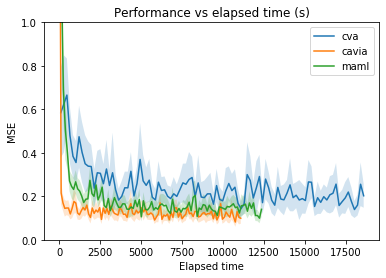

In [38]:
cva = cva_loggers[1000000][100]
cavia = cavia_loggers[1000000][1]
maml = maml_loggers[1000000][1]

plt.plot(cva.elapsed_time, cva.test_loss, label='cva')
plt.fill_between(cva.elapsed_time, cva.test_loss-cva.test_conf, cva.test_loss+cva.test_conf, alpha=alpha)
plt.plot(cavia.elapsed_time, cavia.test_loss, label='cavia')
plt.fill_between(cavia.elapsed_time, cavia.test_loss-cavia.test_conf, cavia.test_loss+cavia.test_conf, alpha=alpha)
plt.plot(maml.elapsed_time, maml.test_loss, label='maml')
plt.fill_between(maml.elapsed_time, maml.test_loss-maml.test_conf, maml.test_loss+maml.test_conf, alpha=alpha)

plt.ylim(0, 1)
plt.ylabel('MSE')
plt.xlabel('Elapsed time')
plt.title('Performance vs elapsed time (s)')
plt.legend() 
# fig = plt.gcf()
# fig.set_size_inches(10, 8)
plt.show()
